<a href="https://colab.research.google.com/github/gbfernandes2002/DS101-Iris_analysis/blob/master/Full_Analysis_of_Car_Prices_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Full analysis of the used cars prices data set


---
## Mounting Google Drive to upload data 
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd/content/drive/My\ Drive/Cursos_Udemy/Data_Science_Bootcamp/part_5_advanced_statistical_methods_\(machine_learning\)/S35_L233

/content/drive/My Drive/Cursos_Udemy/Data_Science_Bootcamp/part_5_advanced_statistical_methods_(machine_learning)/S35_L233


---
## Importing Libraries
---

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

---
## Loading data set 
---

In [0]:
data_raw = pd.read_csv('1.04. Real-life example.csv')

In [5]:
data_raw.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [6]:
data_raw.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


---
## Bivariate analysis on categorical variables 
---

### "Brand" Variable

In [0]:
brand_freq = pd.DataFrame(data = data_raw['Brand'].value_counts()).rename(columns={'Brand':'Frequency'})
brand_freq['Price_mean'] = data_raw.groupby('Brand')['Price'].mean()
brand_freq

,Frequency,Price_mean
Volkswagen,936,13125.267930
Mercedes-Benz,921,30608.048122
BMW,694,23525.368087
Toyota,541,22591.220287
Renault,469,8035.127018
Audi,457,18489.633484
Mitsubishi,327,11295.713003


### "Engine Type" variable

In [0]:
EngineT_freq = pd.DataFrame(data = data_raw['Engine Type'].value_counts()).rename(columns={'Engine Type':'Frequency'})
EngineT_freq['Price_mean'] = data_raw.groupby('Engine Type')['Price'].mean()
EngineT_freq

,Frequency,Price_mean
Diesel,2019,20203.661177
Petrol,1559,21604.213765
Gas,613,12213.170132
Other,154,16512.686667


### "Registration" variable

In [0]:
registration_freq = pd.DataFrame(data = data_raw['Registration'].value_counts()).rename(columns={'Registration':'Frequency'})
registration_freq['Price_mean'] = data_raw.groupby('Registration')['Price'].mean()
registration_freq

,Frequency,Price_mean
yes,3947,21002.942831
no,398,4224.137056


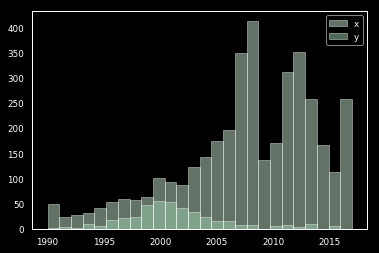

In [81]:
bins = np.linspace(1990, 2017, 27)

plt.hist(data_raw[data_raw['Registration']=='yes'].Year, bins, alpha=0.5, label='x')
plt.hist(data_raw[data_raw['Registration']=='no'].Year, bins, alpha=0.5, label='y')
plt.legend(loc='upper right')
plt.show()

> Question:
> Can the effect of the variable "Registration" be captured by "Year"? 

In [0]:
data_raw_yearsel = data_raw[(data_raw['Year']>1998)&(data_raw['Year']<2004)]

registration_freq_yearsel = pd.DataFrame(data = data_raw_yearsel['Registration'].value_counts()).rename(columns={'Registration':'Frequency'})
registration_freq_yearsel['Price_mean'] = data_raw_yearsel.groupby('Registration')['Price'].mean()
registration_freq_yearsel

,Frequency,Price_mean
yes,466,8701.690461
no,225,3276.215247


> Conclusion: 
> The lower prices of "Registration" variable is not fully explained by the age of the vehicle. Hence, we will keep the variable in the analysis. 

### "Body" variable

In [0]:
body_freq = pd.DataFrame(data = data_raw['Body'].value_counts()).rename(columns={'Body':'Frequency'})
body_freq['Price_mean'] = data_raw.groupby('Body')['Price'].mean()
body_freq

,Frequency,Price_mean
sedan,1649,15577.630387
crossover,901,37899.192857
van,675,12641.511495
other,433,22471.287560
vagon,402,9973.878641
hatch,285,10085.765484


In [0]:
body_freq.to_excel('output.xlsx')

---

## Cleaning the data set


---


### Dropping unnecessary variables

We will drop the "Model" variable since it has too many different values and we are not going to work with string values more deeply than building dummies.

In [0]:
data_raw_1 = data_raw.drop('Model',axis=1)

### Dropping observations with missing value in any variable

In [0]:
data_raw_2 = data_raw_1.dropna(axis=0)

### Checking bell-shaped distribution

#### Defining dark background color palette 

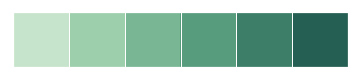

In [4]:
sns.palplot(sns.color_palette("ch:2.5,-.2,dark=.3"))

In [0]:
sns.set_palette("ch:2.5,-.2,dark=.3")
sns.set_context('paper')
plt.style.use('dark_background')

#### "Price" variable

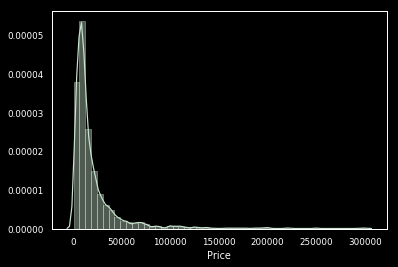

In [56]:
sns.distplot(data_raw_2['Price'])

In [76]:
data_raw_2['Log_Price'] = np.log(data_raw_2['Price'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


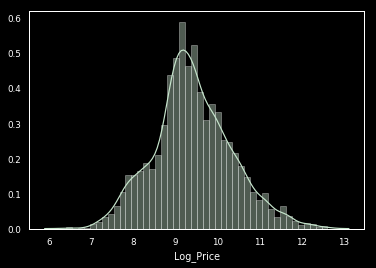

In [67]:
sns.distplot(data_raw_2['Log_Price'])

#### Mileage

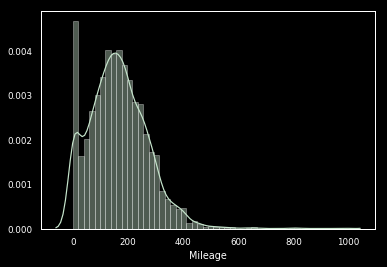

In [68]:
sns.distplot(data_raw_2['Mileage'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


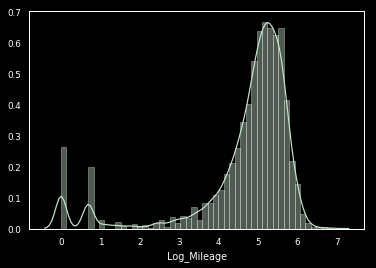

In [77]:
data_raw_2['Log_Mileage'] = np.log(data_raw_2['Mileage']+1)
sns.distplot(data_raw_2['Log_Mileage'])

#### EngineV

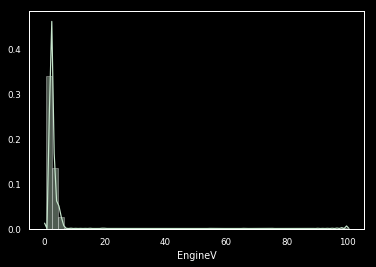

In [71]:
sns.distplot(data_raw_2['EngineV'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


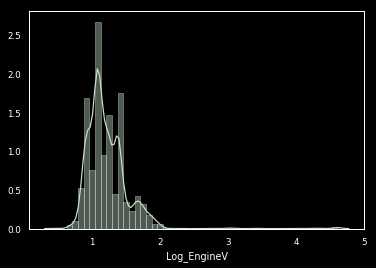

In [78]:
data_raw_2['Log_EngineV'] = np.log(data_raw_2['EngineV']+1)
sns.distplot(data_raw_2['Log_EngineV'])

#### Year

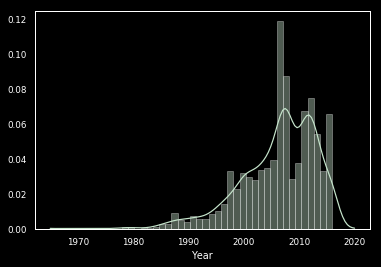

In [73]:
sns.distplot(data_raw_2['Year'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


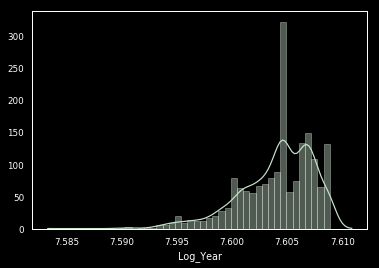

In [79]:
data_raw_2['Log_Year'] = np.log(data_raw_2['Year'])
sns.distplot(data_raw_2['Log_Year'])

### Capping outliers

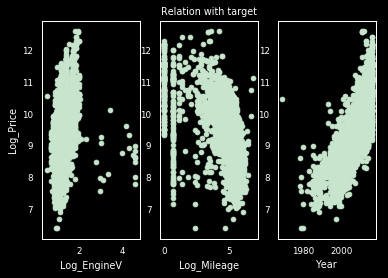

In [87]:
plt.subplot(1, 3, 1)
plt.scatter(data_raw_2['Log_EngineV'], data_raw_2['Log_Price'])
plt.ylabel('Log_Price')
plt.xlabel('Log_EngineV')

plt.subplot(1, 3, 2)
plt.scatter(data_raw_2['Log_Mileage'], data_raw_2['Log_Price'])
plt.title('Relation with target')
plt.xlabel('Log_Mileage')

plt.subplot(1, 3, 3)
plt.scatter(data_raw_2['Year'], data_raw_2['Log_Price'])
plt.xlabel('Year')

plt.show()

#### Year variable

In [91]:
data_raw_2[data_raw_2['Year'] < 1980].count()

Brand           6
Price           6
Body            6
Mileage         6
EngineV         6
Engine Type     6
Registration    6
Year            6
Log_Price       6
Log_Mileage     6
Log_EngineV     6
Log_Year        6
dtype: int64

In [0]:
data_raw_3 = data_raw_2.drop(data_raw_2[data_raw_2['Year'] < 1980].index,axis=0)

#### Engine Volume

In [100]:
data_raw_2[data_raw_2['EngineV'] > 10].count()

Brand           20
Price           20
Body            20
Mileage         20
EngineV         20
Engine Type     20
Registration    20
Year            20
Log_Price       20
Log_Mileage     20
Log_EngineV     20
Log_Year        20
dtype: int64

In [0]:
data_raw_3 = data_raw_3.drop(data_raw_3[data_raw_3['EngineV'] > 10].index,axis=0)

#### Log_Price

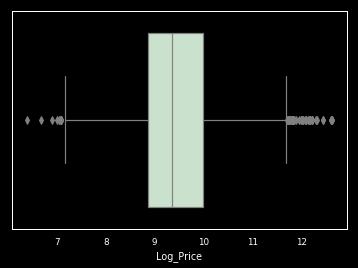

In [106]:
sns.boxplot(data_raw_3['Log_Price'])

In [115]:
data_raw_3[(data_raw_3['Log_Price']<7.2)^(data_raw_3['Log_Price']>11.7)].count()

Brand           65
Price           65
Body            65
Mileage         65
EngineV         65
Engine Type     65
Registration    65
Year            65
Log_Price       65
Log_Mileage     65
Log_EngineV     65
Log_Year        65
dtype: int64

In [0]:
data_raw_3 = data_raw_3.drop(data_raw_3[(data_raw_3['Log_Price']<7.2)^(data_raw_3['Log_Price']>11.7)].index,axis=0)

### Keeping only inputs and target

In [0]:
data_preprocessed = data_raw_3.drop(data_raw_3[['Log_Year','Price','Mileage','EngineV']],axis=1)

In [120]:
data_preprocessed.describe(include='all')

,Brand,Body,Engine Type,Registration,Year,Log_Price,Log_Mileage,Log_EngineV
count,3934,3934,3934,3934,3934.000000,3934.000000,3934.000000,3934.000000
unique,7,6,4,2,NaN,NaN,NaN,NaN
top,Volkswagen,sedan,Diesel,yes,NaN,NaN,NaN,NaN
freq,872,1500,1833,3572,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2006.392476,9.389984,4.697504,1.204866
std,NaN,NaN,NaN,NaN,6.492461,0.877504,1.314916,0.246993
min,NaN,NaN,NaN,NaN,1980.000000,7.207860,0.000000,0.470004
25%,NaN,NaN,NaN,NaN,2003.000000,8.853665,4.543295,1.029619
50%,NaN,NaN,NaN,NaN,2007.000000,9.350102,5.081404,1.163151
75%,NaN,NaN,NaN,NaN,2011.000000,9.952278,5.442418,1.386294


### Saving preprocessed data set

In [0]:
data_preprocessed.to_csv('data_preprocessed.csv', encoding='utf-8', index=False)

---
## Data Prep: Inputs and target 
---

### Loading data preprocessed

In [0]:
data_preprocessed = pd.read_csv('data_preprocessed.csv')

### Creating dummy variables

In [14]:
data_preprocessed.head()

,Brand,Body,Engine Type,Registration,Year,Log_Price,Log_Mileage,Log_EngineV
0,BMW,sedan,Petrol,yes,1991,8.342840,5.627621,1.098612
1,Mercedes-Benz,van,Diesel,yes,1999,8.974618,6.059123,1.360977
2,Mercedes-Benz,sedan,Gas,yes,2003,9.495519,5.883322,1.791759
3,Audi,crossover,Petrol,yes,2007,10.043249,5.484797,1.648659
4,Toyota,crossover,Petrol,yes,2011,9.814656,4.795791,1.098612


In [0]:
x_categ_dummy = pd.get_dummies(data_preprocessed[['Brand','Body','Engine Type','Registration']],drop_first=True)

In [16]:
x_categ_dummy.describe(include='all')

,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000
mean,0.160651,0.195984,0.077529,0.109812,0.128114,0.221657,0.066853,0.097102,0.381291,0.096085,0.156584,0.148195,0.025928,0.359939,0.907982
std,0.367255,0.397007,0.267463,0.312695,0.334259,0.415415,0.249799,0.296135,0.485766,0.294746,0.363454,0.355339,0.158940,0.480043,0.289089
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scaling continuous inputs

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()
scaler.fit(data_preprocessed[['Log_Mileage','Log_EngineV','Year']])
data_preprocessed[['Log_Mileage','Log_EngineV','Year']] = scaler.transform(data_preprocessed[['Log_Mileage','Log_EngineV','Year']])

In [0]:
x_continuous = data_preprocessed[['Year','Log_Mileage','Log_EngineV']]

### Building input and target 

In [42]:
x_input = x_continuous.join(x_categ_dummy)
x_input.head()

,Year,Log_Mileage,Log_EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,-2.371124,0.707448,-0.430242,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,-1.138769,1.035650,0.632126,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,-0.522592,0.901935,2.376456,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,0.093586,0.598816,1.797010,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.709763,0.074757,-0.430242,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [43]:
y_target = data_preprocessed[['Log_Price']]
y_target.describe()

,Log_Price
count,3934.000000
mean,9.389984
std,0.877504
min,7.207860
25%,8.853665
50%,9.350102
75%,9.952278
max,11.686879


---
## Modelling data
---

### Verifying Multicollinearity Issues

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [50]:
x_VIF = add_constant(x_input)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [52]:
pd.Series([variance_inflation_factor(x_VIF.values, i) 
               for i in range(x_VIF.shape[1])], 
              index=x_VIF.columns)

const                  25.783873
Year                    1.611136
Log_Mileage             1.472137
Log_EngineV             1.721624
Brand_BMW               2.181572
Brand_Mercedes-Benz     2.476188
Brand_Mitsubishi        1.792812
Brand_Renault           2.220365
Brand_Toyota            2.149823
Brand_Volkswagen        2.733034
Body_hatch              1.699070
Body_other              1.536383
Body_sedan              2.421878
Body_vagon              1.793788
Body_van                2.282787
Engine Type_Gas         1.489981
Engine Type_Other       1.056639
Engine Type_Petrol      1.587505
Registration_yes        1.187808
dtype: float64

> Conclusion:
> No issue on multicollinearity

### Split Train Test Data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_input, y_target, 
                                                    test_size=0.25, random_state=42)

In [54]:
X_train.describe()

,Year,Log_Mileage,Log_EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.000000,2950.00000
mean,0.011028,0.002063,-0.004716,0.163051,0.195932,0.077627,0.111864,0.128475,0.216949,0.065085,0.096610,0.376610,0.096949,0.161695,0.141695,0.025424,0.357288,0.91322
std,0.997522,0.987487,0.991078,0.369475,0.396984,0.267629,0.315253,0.334674,0.412238,0.246717,0.295476,0.484618,0.295939,0.368233,0.348796,0.157435,0.479282,0.28156
min,-4.065612,-3.572929,-2.975609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,-0.522592,-0.117292,-0.709608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,0.247630,0.280088,-0.168912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
75%,0.863808,0.566582,0.734643,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000
max,1.479985,1.521784,4.444895,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [55]:
X_test.describe()

,Year,Log_Mileage,Log_EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,-0.033063,-0.006185,0.014137,0.153455,0.196138,0.077236,0.103659,0.127033,0.235772,0.072154,0.098577,0.395325,0.093496,0.141260,0.167683,0.027439,0.367886,0.892276
std,1.007683,1.037590,1.027162,0.360609,0.397276,0.267101,0.304972,0.333179,0.424696,0.258875,0.298245,0.489169,0.291274,0.348467,0.373774,0.163442,0.482475,0.310189
min,-3.449435,-3.572929,-2.072054,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.676636,-0.101279,-0.709608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.093586,0.291995,-0.168912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.709763,0.569868,0.734643,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.479985,1.666530,3.280010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
y_train.describe()

,Log_Price
count,2950.000000
mean,9.398021
std,0.872518
min,7.207860
25%,8.853665
50%,9.350102
75%,9.965286
max,11.686879


In [57]:
y_test.describe()

,Log_Price
count,984.000000
mean,9.365889
std,0.892299
min,7.236339
25%,8.835518
50%,9.328114
75%,9.928180
max,11.652687


### Fitting the regression

In [103]:
pip install -U statsmodels

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.10.0)


In [0]:
import statsmodels.api as sm

In [105]:
X_train_c = add_constant(X_train)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [0]:
model = sm.OLS(y_train,X_train_c)

In [0]:
results = model.fit()

In [119]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_Price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1291.
Date:                Wed, 10 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:00:22   Log-Likelihood:                -553.95
No. Observations:                2950   AIC:                             1146.
Df Residuals:                    2931   BIC:                             1260.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.0257    

### Assessing performance on test data with simplest plot

In [120]:
X_test_c = add_constant(X_test)
y_test_pred = pd.DataFrame({'y_pred':results.predict(X_test_c)})

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [0]:
y_test_pred_1 = y_test_pred.reset_index(drop=True)
y_test_real_1 = y_test.reset_index(drop=True)

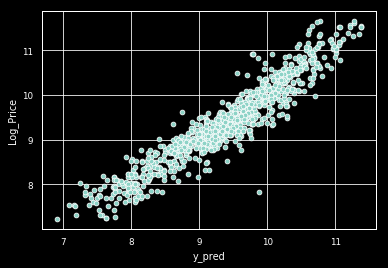

In [139]:
sns.scatterplot(y_test_pred_1['y_pred'],y_test_real_1['Log_Price'])